# Keras Sequential Model: Programming Practice

COSC 410: Applied Machine Learning\
Colgate University\
*Prof. Apthorpe*

## Overview

This notebook will give you practice with the following topics:
  1. Creating and training FNNs using the Keras Sequential Model
  2. Visualizing FNN architectures & parameter counts
  3. FNN hyperparameter options

We will be using the Fashion MNIST dataset available directly from Tensorflow. The dataset consists of 28x28-pixel grayscale images of clothes in 10 different classes. The goal is to predict the type of each clothing item from the image. Fashion MNIST is more difficult that the MNIST handwritten digits and is a good starting dataset for neural network practice. 

## Part 1. Data Import

First we will import the libraries:

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras as ks

np.random.seed(0) # set random seeds so everyone gets same results
tf.random.set_seed(1)

Next we will load the data and split it into features and labels

In [20]:
# Load Fashion MNIST data and split into train/test sets
fashion_mnist = ks.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

As always, we should check the shape of the data

In [21]:
# Print shapes of dataframes
print(train_images.shape)
print(test_images.shape)
print(len(train_labels))
print(len(test_labels))

# Print distributions of classes
print(np.unique(train_labels, return_counts=True)[1])
print(np.unique(test_labels, return_counts=True)[1])

(60000, 28, 28)
(10000, 28, 28)
60000
10000
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


This means that each image is 28x28 pixels as expected. We have have 60000 training images and 10000 images (one label each). The last two lines shows the number of images of each class (0 to 9). The fact that the classes are balanced means that accuracy is a fine metric to use for this classification problem. 

## Part 2. Creating a FNN using the Sequential Model

The `Sequential` class provides the easiest way to create a deep learning network using Keras. A `Sequential` model can include any number of neural network layers, as well as special layers for data preprocessing or output interpretation. The official guide to the Sequential model is available here: https://keras.io/guides/sequential_model/

The first step to creating a FNN using this method is to create an instance of the `Sequential` class

In [22]:
# Create sequential model object
model = ks.models.Sequential()

### Part 2.1 Adding preprocessing & input layers 

Next, we need to add an *input* layer to the model that will tell the model the shape of the input data (# features). Since we are working with images, it is easier to feed them into the network if we first flatten them into 784 element vectors instead of keeping them as 28x28 pixel matrices.  We will therefore make the first layer in the model a `Flatten` layer that will perform this transformation.

**Important Discussion:** For FNNs, why does flattening 2D images into 1D vectors not affect model predictions? *(Note that this will not be true for the convolutional networks we will see in two weeks)*

In [23]:
# Add a Flatten layer to the model
model.add(ks.layers.Flatten(input_shape=[28,28]))

Pay careful attention to the this previous line of code. This format is paradigmatic of the Keras Sequential model. New layer objects are created and added in sequence to the model with the `.add()` method. Keras has many available layers to add to sequential models: https://keras.io/api/layers/

**Note:** If your data does not need flattening, you can instead use a pass-through `Input` layer (https://keras.io/api/layers/core_layers/input/) OR go straight to adding the hidden layers

**Discussion:** Why do we NOT need to standardize or normalize the input data for fashion MNIST?

### Part 2.2: Adding Feedforward Hidden Layers

The perceptron layers that we have used in our lecture example (hidden layer 1, hidden layer 2, and the output layer) are available in Keras as `ks.layers.Dense`. This name was chosen because the neurons in these layers are *densely connected*, i.e. each of the neurons in the layer is connected to *all* of the neurons or input features in the previous layer.

Let's use `Dense` layers to create a FNN model with 2 hidden layers with 50 neurons each:

In [24]:
# Add two Dense layers to the model
model.add(ks.layers.Dense(50, activation="sigmoid"))
model.add(ks.layers.Dense(50, activation="sigmoid"))

### Part 2.3: Adding Output Layers

Finally, we need to add an output layer with 10 neurons (because fashion MNIST is a multiclass classifiation task with 10 classes).

**Important:** We will use the `softmax` activation function for the output layer. This normalizes the outputs into class probabilities, such that all outputs sum to 1, and the output of neuron X corresponds to the probability of predicting class X: https://en.wikipedia.org/wiki/Softmax_function

In [25]:
# Add the output layer
model.add(ks.layers.Dense(10, activation="softmax"))

That's all it takes to define a FNN architecture using Keras! Next, we need to compile the model, specify some more hyperparamters, and do the training!

### Part 2.4: Model Compilation & Training

In the *model compilation* step, we specify additional training-related hyperparameters, and then Keras prepares the model for training using the layers we have created. 

In [26]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In this example, we have specified the *loss function* that the training will try to minimize, the *optimizer* algorithm that the training will use to find optimal parameters, and the final performance *metrics* that we care about measuring. We will come back to these options later in the notebook

Now we are finally ready to train the model. Just like Scikit-Learn, Keras allows to perform the entirety of the training task (including all of backpropagation with all of the derivative calculations we discussed in class) with a single call to the `fit()` method. 

In [27]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6082 - accuracy: 0.6037
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9491 - accuracy: 0.6988
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7904 - accuracy: 0.7235
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7348 - accuracy: 0.7368
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7236 - accuracy: 0.7387
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6999 - accuracy: 0.7462
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6954 - accuracy: 0.7466
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6935 - accuracy: 0.7469
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6631 - accuracy: 0.7594
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.692

This printed output shows us the epoch count and the number of batches per epoch, as well as the *training* loss and *training* accuracy at the end of every step.

**Discussion:** What is the batch size being used for this training?

### Part 2.5: Test Set Evaluation

Now that we have our trained model, let's see how well it performs on the test data. 

**Important:** Unlike Scikit-Learn, a Keras model's `.predict()` method returns the probability that the argument examples are in each class rather than the class predictions themselves:

In [31]:
# Predict class probabilities for test examples
test_prediction_probs = model.predict(test_images)

# Print the predicted class probabilities for first test example
print(test_prediction_probs[0])

[1.1396416e-03 1.9018025e-04 1.1868952e-03 4.5377598e-03 5.2535394e-03
 3.9084244e-01 5.3876131e-03 1.1545824e-01 1.7679527e-02 4.5832416e-01]


If we want to predict the class labels, we need to find the index of the maximum class probability

In [33]:
# Predict class labels for test examples
test_predictions = np.argmax(model.predict(test_images), axis=1)

# Print the actual predicted class for first test example
print(test_predictions[0])

9


Let's examine a few of these predictions

Ankle boot
Pullover
Trouser


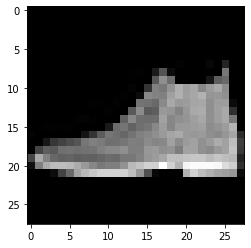

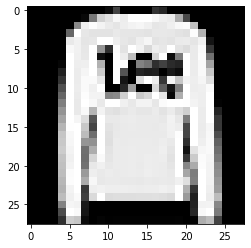

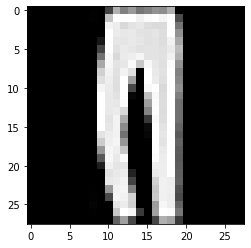

In [35]:
# Ordered list of classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print the predicted class and the image for the first 3 examples in the test set
for i in range(3):
    plt.figure()
    plt.imshow(test_images[i], cmap="gray")
    print(class_names[test_predictions[i]])

Finally, we can compute the test accuracy

In [38]:
# Compute and print the test accuracy
test_acc = metrics.accuracy_score(test_labels, test_predictions)
print(f"Test accuracy is {test_acc}")

Test accuracy is 0.7444


## Part 3. Summarizing and Visualizing Keras Models

Inspecting models before and after training is an important part of deep learning. Keras provides several options to do so. We will try some basic (but still very useful) ones today.

The `.count_params()` method of a model will tell you the number of parameters that have to be optimized by training:

In [39]:
# Print the number of trainable parameters in the model
model.count_params()

42310

The `.summary()` method will give you an even better summary

In [40]:
# Print a summary of the model architecture and trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


The `utils.plot_model` function creates and saves a representation of the model.

In [41]:
# Create a graphical representation of the model
ks.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In the next class, we will create interactive visualizations of our models with Tensorboard

## Part 4: FNN Hyperparameters

Like Scikit-Learn, Keras provides us with many hyperparameters to tune, usually via keyword arguments. Let's look at the ones that are most relevant to FNNs.

First, let's copy the code from above so the whole model creation and training process is in one cell:

In [ ]:
# Perform entire FNN pipeline
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[28,28]))
model.add(ks.layers.Dense(50, activation="sigmoid"))
model.add(ks.layers.Dense(50, activation="sigmoid"))
model.add(ks.layers.Dense(10, activation="softmax"))
model.compile()

Deep learning in 10 lines!!

### Part 4.1: `Dense` Layer Hyperparameters

The `Dense` layer objects that comrpise the bulk of our model have many keyword arguments that we can customize. The documentation lists them all (https://keras.io/api/layers/core_layers/dense/), but we will also go through the most important here:

* `units` : The number of neurons in the layer *(required)*

* `activation=None` : The activation function. The most common options for **hidden layers** are `"relu"`, `"sigmoid"`, and `"tanh"`. The most common options for **output layers** are `"sigmoid"` (for binary classification) `"softmax"` (for multiclass classification), and `"linear"` (for regression). Note that the default `"None"` is equivalent to `"linear"` i.e. no activiation function. All options here: https://keras.io/api/layers/activations/

* `use_bias=True` : Whether or not to use biases `b` in addition to weights `w`. The default `True` is usually fine, unless you particularly want to reduce the number of parameters

* `kernel_initializer="glorot_uniform"` : How the starting values of the weights `w` are initialized. All options here: https://keras.io/api/layers/initializers/

* `bias_initializer="zeros"` : How the starting values of the biases `b` are initialized. All options here: https://keras.io/api/layers/initializers/

* `kernel_regularizer=None` : Penalty added to the cost function to incentivize lower *weight parameters* `w` and reduce overfitting. All options here: https://keras.io/api/layers/regularizers/

* `bias_regularizer=None` : Penalty added to the cost function to incentivize lower *bias parameters* `b` and reduce overfitting. All options here: https://keras.io/api/layers/regularizers/

* `activity_regularizer=None` : Penalty added to the cost function to incentivize lower *neuron outputs* and reduce overfitting. All options here: https://keras.io/api/layers/regularizers/



### Part 4.2: Model Compilation Hyperparameters 

The `.compile()` method of the model also has several keyword arguments you can use to set hyperparameters. Docs here: https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile/. These are are the most important:

* `optimizer="rmsprop"` : The actual training algorithm that updates the parameters (and learning rates) to fit the model. The default, `"rmsprop"`uses a moving window average of the gradient to produce more stable gradient descent. The `"sgd"` option uses gradient descent as we have described it in class. Other popular options are `"adam"` and `"adagrad"` which often provide the best performance; however, their details are outside the scope of the course. Details on all available optimizers here: https://keras.io/api/optimizers/

* `loss=None` : The loss or error function that the training actually tries to minimize. *There is no default, so this must be specified.* The most common choices are `"binary_crossentropy"` for binary classification, `"categorical_crossentropy"` and `"sparse_categorical_crossentropy"` for multiclass classification, and `"mean_squared_error"` for regression. All options here: https://keras.io/api/losses/

* `metrics=None` : *List* of performance metrics to compute in addition to the loss. These metrics are not used for training optimization but for us to see how well the model is performing. All options here: https://keras.io/api/metrics/.

**Discussion:** What is the important difference between the `"categorical_crossentropy"` and `"sparse_categorical_crossentropy"` losses and between the `"accuracy"` and `"categorical_accuracy"` metrics? Read the docs to figure it out!

### Part 4.3: `fit` Hyperparameters

The `.fit()` method of the model has additional keyword arguments you can use to change training settings. Documentation here: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

* `x`  : Training examples 

* `y`  : Training labels 

* `batch_size=None` : Number of examples to use per gradient descent step. Default (`None`) is 32

* `epochs=1` : Number of training iterations over *entire* dataset 

* `verbose=1` : Whether to print the training progress bars

* `validation_split=0.0` : Fraction of training data to be used as a validation set

* `validation_data=None`  : Separate (examples, labels) tuple to be used as validation data. Use either this argument or validation_split but not both.

* `shuffle=True`  : Whether to randomize the order of the training data

* `class_weight=None` : dictionary mapping *class* indices (integers) to a weight (float) value, used for weighting the loss function to pay "more attention" to some *classes* during training

* `sample_weight=None` : dictionary mapping *example* indices (integers) to a weight (float) value, used for weighting the loss function to pay "more attention" to particular *examples* during training

* `validation_freq=1` : How often (in epochs) to compute the performance metrics on the validation set. The default `1` computes them every epoch

### Part 4.4: Practice with Hyperparameters

Update the prior model to use 1) 4 hidden layers with [256, 128, 64. 32] nodes, 2) the "relu" activation function, 3) the "adam" optimizer, 4) a batch size of 128, 5) 30 epochs of training, and 6) a 90%/10% train/validation split. Train the model and print the prediction accuracy on the test set. 

In [ ]:
# YOUR CODE HERE


## Part 5. Try It Yourself

1. Practice creating FNN models for the fashion MNIST dataset. Repeat until you no longer need to refer to the above code to create and train a sequential model with `Dense` layers from scratch.
2. Try modifying the number of layers and number of nodes per layer to see whether you can achieve better performance than the final example in Part 4.

